EQUIPO 2
Ana Maytte Fabian Guevara 1897145

Emmanuel Esaú Heraldez Valdez 2077359

Diego Adrián Rodríguez Ordaz 2032270

Ángel Gabriel Melchor Salinas 1974670

Jorge Zamora Villarreal 2077438


IMPORTAR BIBLIOTECAS

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive

IMPORTAR ARCHIVOS DE GOOGLE DRIVE

In [2]:
# Monta Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta del archivo en Google Drive
data_dir = '/content/drive/MyDrive/BIRDS.zip'

In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/BIRDS.zip'  # Ruta del archivo zip
extract_path = '/content/drive/MyDrive/BIRDS'  # Ruta donde se descomprimirán las imágenes

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

GENERARDOR DE DATOS

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorio que contiene las imágenes
data_dir =  '/content/drive/MyDrive/BIRDS'

# Preprocesamiento y aumento de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Cargar y preprocesar las imágenes
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)



DEFINICION MODELO CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

ENTRENAMIENTO MODELO

In [ ]:
# Entrenar el modelo
history = model.fit(data_generator, epochs=10, validation_split=0.2)



ValueError: ignored

PREDICCIONES

1/1 [==============================] - 0s 357ms/step


NameError: ignored

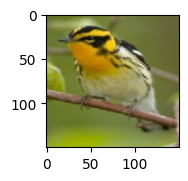

In [ ]:
# Mostrar 10 predicciones
validation_images, validation_labels = next(data_generator)
validation_predictions = model.predict(validation_images)

class_names = data_generator.class_indices
class_names = {v: k for k, v in class_names.items()}

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(validation_images[i])
    predicted_label = class_names[np.argmax(validation_predictions[i])]
    true_label = class_names[np.argmax(validation_labels[i])]
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis("off")
plt.show()


Grafica la precisión de entrenamiento vs. precisión de validación durante el entrenamiento:

In [ ]:
# Graficar la precisión de entrenamiento vs. precisión de validación durante el entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


NameError: ignored